# PROYECTO FINAL

## Limpieza y Exploración de Datos

### Cargar y Mostrar las Primeras Filas de los Datos

In [1]:
# Imports de la biblioteca estándar de Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

# Imports de bibliotecas de terceros relacionadas
from sklearn.impute import KNNImputer
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc
from xgboost import XGBClassifier

# Imports específicos de la aplicación local o biblioteca personalizada
from sklearn.metrics import classification_report


Importamos las bibliotecas necesarias para el análisis y la visualización de datos

In [2]:
#Cargar los datos
clientes = pd.read_csv('/datasets/final_provider/personal.csv')
contratos = pd.read_csv('/datasets/final_provider/contract.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
telefono = pd.read_csv('/datasets/final_provider/phone.csv')

Cargamos los datos desde los archivos CSV en el sistema

In [3]:
#Mostrar las primeras filas de cada conjunto de datos
clientes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Utilizamos el método `head()` para mostrar las primeras filas de cada conjunto de datos. El conjunto de datos "clientes" proporciona información básica sobre cada cliente, incluyendo su identificación, género, si son ciudadanos senior, su estado de pareja y si tienen dependientes.

- customerID: Un identificador único para cada cliente.
- gender: El género del cliente ( Male o Female).
- SeniorCitizen: Indica si el cliente es un ciudadano de la tercera edad (1) o no (0).
- Partner: Indica si el cliente tiene pareja o no (Yes o No).
- Dependents: Indica si el cliente tiene dependientes o no (Yes o No).

In [4]:
#Mostrar las primeras filas de cada conjunto de datos
contratos.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


Utilizamos el método `head()`para mostrar las primeras filas de cada conjunto de datos. El conjunto de datos "contratos" proporciona información sobre los detalles de los contratos de los clientes, incluyendo fechas de inicio y finalización, tipo de contrato, método de pago y cargos asociados.

- customerID: Un identificador único para cada cliente.
- BeginDate: La fecha de inicio del contrato.
- EndDate: La fecha de finalización del contrato.
- Type: El tipo de contrato (por ejemplo, "Month-to-month" para contrato mensual, "One year" para contrato anual, etc.).
- PaperlessBilling: Indica si el cliente ha optado por facturación sin papel (Yes o No).
- PaymentMethod: El método de pago del cliente (por ejemplo, "Electronic check", "Mailed check", etc.).
- MonthlyCharges: El cargo mensual del contrato.
- TotalCharges: El total de los cargos del contrato.

In [5]:
#Mostrar las primeras filas de cada conjunto de datos
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


Utilizamos el método `head()`para mostrar las primeras filas de cada conjunto de datos. El conjunto de datos "internet" proporciona información sobre los servicios de internet de los clientes, incluyendo:

- customerID: Un identificador único para cada cliente.
- InternetService: El tipo de servicio de internet (por ejemplo, DSL, Fiber optic, etc.).
- OnlineSecurity: Indica si el cliente tiene servicio de seguridad en línea (Yes o No).
- OnlineBackup: Indica si el cliente tiene servicio de respaldo en línea (Yes o No).
- DeviceProtection: Indica si el cliente tiene servicio de protección de dispositivos (Yes o No).
- TechSupport: Indica si el cliente tiene servicio de soporte técnico (Yes o No).
- StreamingTV: Indica si el cliente tiene servicio de streaming de TV (Yes o No).
- StreamingMovies: Indica si el cliente tiene servicio de streaming de películas (Yes o No).

In [6]:
#Mostrar las primeras filas de cada conjunto de datos
telefono.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Utilizamos el método `head()`para mostrar las primeras filas de cada conjunto de datos. El conjunto de datos "teléfono" proporciona información sobre las líneas telefónicas de los clientes, incluyendo:

- customerID: Un identificador único para cada cliente.
- MultipleLines: Indica si el cliente tiene múltiples líneas telefónicas (Yes o No).

### Estructura de los Datos

In [7]:
#Ver la Estructura de los Archivos
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


Utilizamos el método `info()` para mostrar la estructura de los archivos de datos, incluyendo el tipo de datos de cada columna y la cantidad de valores no nulos. La Descripción de los tipos de datos en el archivo "clientes" es la siguiente:

- Número de Filas (Registros): 7043
- Número de Columnas (Variables): 5
- Valores No Nulos: Todos los campos tienen 7043 valores no nulos

Tipo de datos:
- customerID: Object
- gender, Partner, Dependents: Object
- SeniorCitizen: Int64


In [8]:
#Ver la Estructura de los Archivos
contratos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


Utilizamos el método `info()` para mostrar la estructura de los archivos de datos, incluyendo el tipo de datos de cada columna y la cantidad de valores no nulos. La Descripción de los tipos de datos en el archivo "contratos" es la siguiente:

- Número de Filas (Registros): 7043
- Número de Columnas (Variables): 8
- Valores No Nulos: Todos los campos tienen 7043 valores no nulos

Tipo de datos:
- customerID, BeginDate, EndDate, Type, PaperlessBilling, PaymentMethod: Object
- MonthlyCharges: Float64


In [9]:
#Ver la Estructura de los Archivos
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


Utilizamos el método `info()` para mostrar la estructura de los archivos de datos, incluyendo el tipo de datos de cada columna y la cantidad de valores no nulos. La Descripción de los tipos de datos en el archivo "internet" es la siguiente:

- Número de Filas (Registros): 5517
- Número de Columnas (Variables): 8
- Valores No Nulos: Todos los campos tienen 5517 valores no nulos

Tipo de datos:
- customerID, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies: Object


In [10]:
#Ver la Estructura de los Archivos
telefono.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Utilizamos el método `info()` para mostrar la estructura de los archivos de datos, incluyendo el tipo de datos de cada columna y la cantidad de valores no nulos. La Descripción de los tipos de datos en el archivo "telefono" es la siguiente:

- Número de Filas (Registros): 6361
- Número de Columnas (Variables): 2
- Valores No Nulos: Todos los campos tienen 6361 valores no nulos

Tipo de datos:
- customerID, MultipleLines: Object

### Limpieza y Preparación de Datos

#### Renombrar Columnas

In [11]:
# Renombrar columnas de los cojuntos de datos
clientes.columns = ['id_cliente', 'genero', 'ciudadano_senior', 'pareja', 'dependientes']
contratos.columns = ['id_cliente', 'fecha_inicio', 'fecha_fin', 'tipo_contrato', 'facturacion_electronica', 'metodo_pago', 'cargos_mensuales', 'cargos_totales']
internet.columns = ['id_cliente', 'servicio_internet', 'seguridad_en_linea', 'respaldo_en_linea', 'proteccion_dispositivo', 'soporte_tecnico', 'tv_streaming', 'peliculas_streaming']
telefono.columns = ['id_cliente', 'lineas_multiples']


In [12]:
#Mostrar nuevamente los datos
clientes.head()

,id_cliente,genero,ciudadano_senior,pareja,dependientes
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [13]:
#Mostrar nuevamente los datos
contratos.head()

,id_cliente,fecha_inicio,fecha_fin,tipo_contrato,facturacion_electronica,metodo_pago,cargos_mensuales,cargos_totales
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [14]:
#Mostrar nuevamente los datos
internet.head()

,id_cliente,servicio_internet,seguridad_en_linea,respaldo_en_linea,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [15]:
#Mostrar nuevamente los datos
telefono.head()

,id_cliente,lineas_multiples
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Utilizamos `columns` para renombrar las columnas de cada DataFrame. Los nombres de las columnas las traducimos al español, se han convertido a minúsculas y los espacios se han reemplazado por guiones bajos.
Mostramos las primeras filas de los conjuntos de datos para verificar que los cambios se aplicaran correctamente.

#### Cambiar Tipos de Datos

In [16]:
#Convertir tipos de datos en el DataFrame de clientes
clientes['ciudadano_senior'] = clientes['ciudadano_senior'].astype('category')
clientes['pareja'] = clientes['pareja'].astype('category')
clientes['dependientes'] = clientes['dependientes'].astype('category')
clientes['genero'] = clientes['genero'].astype('category')

clientes.dtypes

id_cliente            object
genero              category
ciudadano_senior    category
pareja              category
dependientes        category
dtype: object

In [17]:
#Convertir tipos de datos en el DataFrame de contratos
contratos['fecha_inicio'] = pd.to_datetime(contratos['fecha_inicio'])
contratos['fecha_fin'] = pd.to_datetime(contratos['fecha_fin'], errors='coerce')
contratos['tipo_contrato'] = contratos['tipo_contrato'].astype('category')
contratos['facturacion_electronica'] = contratos['facturacion_electronica'].astype('category')
contratos['metodo_pago'] = contratos['metodo_pago'].astype('category')
contratos['cargos_mensuales'] = contratos['cargos_mensuales'].astype(float)
contratos['cargos_totales'] = pd.to_numeric(contratos['cargos_totales'], errors='coerce')

contratos.dtypes

id_cliente                         object
fecha_inicio               datetime64[ns]
fecha_fin                  datetime64[ns]
tipo_contrato                    category
facturacion_electronica          category
metodo_pago                      category
cargos_mensuales                  float64
cargos_totales                    float64
dtype: object

In [18]:
#Convertir tipos de datos en el DataFrame de internet
internet['servicio_internet'] = internet['servicio_internet'].astype('category')
internet['seguridad_en_linea'] = internet['seguridad_en_linea'].astype('category')
internet['respaldo_en_linea'] = internet['respaldo_en_linea'].astype('category')
internet['proteccion_dispositivo'] = internet['proteccion_dispositivo'].astype('category')
internet['soporte_tecnico'] = internet['soporte_tecnico'].astype('category')
internet['tv_streaming'] = internet['tv_streaming'].astype('category')
internet['peliculas_streaming'] = internet['peliculas_streaming'].astype('category')

internet.dtypes

id_cliente                  object
servicio_internet         category
seguridad_en_linea        category
respaldo_en_linea         category
proteccion_dispositivo    category
soporte_tecnico           category
tv_streaming              category
peliculas_streaming       category
dtype: object

In [19]:
#Convertir tipos de datos en el DataFrame de teléfono
telefono['lineas_multiples'] = telefono['lineas_multiples'].astype('category')

telefono.dtypes

id_cliente            object
lineas_multiples    category
dtype: object

Convertimos los tipos de datos a un formato adecuado para su posterior analisis y modelado, al final mostramos los tipos de cada columna después de la conversión para verificar que todo se ha hecho correctamente

#### Identificación de Valores Nulos y Duplicados

In [20]:
#Identificar valores nulos en el Dataframe de clientes
clientes.isnull().sum()

id_cliente          0
genero              0
ciudadano_senior    0
pareja              0
dependientes        0
dtype: int64

Utilizamos el metodo`isnull`para identificar la cantidad de valores nulos en cada columna del DataFrame "clientes", observando que no hay valores nulos en ninguna de las variables.

In [21]:
#Contar valores duplicados en el Dataframe de clientes
duplicados_clientes = contratos.duplicated().sum()
duplicados_clientes

0

Utilizamos el método `duplicated()` junto con `sum()` para contar los valores duplicados en el DataFrame "clientes", observanso que no hay valores duplicados.

In [22]:
#Identificar valores nulos en el Dataframe de contratos
contratos.isnull().sum()

id_cliente                    0
fecha_inicio                  0
fecha_fin                  5174
tipo_contrato                 0
facturacion_electronica       0
metodo_pago                   0
cargos_mensuales              0
cargos_totales               11
dtype: int64

Utilizamos el metodo`isnull`para identificar la cantidad de valores nulos en cada columna del DataFrame "contratos", observando que hay 5174 valores nulos en la variable fecha_fin y 11 en cargos_totales.

In [23]:
#Contar valores duplicados en el Dataframe de contratos
duplicados_contratos = contratos.duplicated().sum()
duplicados_contratos

0

Utilizamos el método `duplicated()` junto con `sum()` para contar los valores duplicados en el DataFrame "contratos", observanso que no hay valores duplicados.

In [24]:
#Imputar los valores nulos en la columna cargos_totales del DataFrame contratos usando KNNImputer 
import pandas as pd
from sklearn.impute import KNNImputer

#Configurar el KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

#Seleccionar las columnas que se desean imputar
columns_to_impute = ['cargos_totales']

#Imputar valores nulos usando KNNImputer
contratos[columns_to_impute] = knn_imputer.fit_transform(contratos[columns_to_impute])

#Mostrar los resultados de la imputación
print("Valores nulos después de imputación con KNNImputer:")
print(contratos.isnull().sum())


Valores nulos después de imputación con KNNImputer:
id_cliente                    0
fecha_inicio                  0
fecha_fin                  5174
tipo_contrato                 0
facturacion_electronica       0
metodo_pago                   0
cargos_mensuales              0
cargos_totales                0
dtype: int64


In [25]:
#Crear Vaiables para mejorar los datos de contratos

#Crear la nueva columna 'estado_contrato'
contratos['estado_contrato'] = np.where(contratos['fecha_fin'].isnull(), 'vigente', 'finalizado')
contratos['estado_contrato'] = contratos['estado_contrato'].astype('category')

#Imputar los valores nulos en 'fecha_fin' con la fecha máxima
max_fecha = pd.concat([contratos['fecha_inicio'], contratos['fecha_fin']]).max()
contratos['fecha_fin'].fillna(max_fecha, inplace=True)
contratos.head(20)

#Crear una nueva columna 'numero_meses' calculando la diferencia en meses entre 'fecha_inicio' y 'fecha_fin'
contratos['numero_meses'] = (contratos['fecha_fin'].dt.to_period('M') - contratos['fecha_inicio'].dt.to_period('M')).apply(lambda x: x.n)
contratos.head()

#Eliminar las columnas 'fecha_inicio' y 'fecha_fin'
contratos.drop(columns=['fecha_inicio', 'fecha_fin'], inplace=True)

contratos.head()



,id_cliente,tipo_contrato,facturacion_electronica,metodo_pago,cargos_mensuales,cargos_totales,estado_contrato,numero_meses
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,vigente,1
1,5575-GNVDE,One year,No,Mailed check,56.95,1889.50,vigente,34
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,finalizado,2
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1840.75,vigente,45
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,151.65,finalizado,2


Creamos 2 Variables, la primera de 'estado_contrato' que indica si cada contrato está vigente o finalizado. Se imputaron los valores nulos en 'fecha_fin' con la fecha máxima disponible. La segunda variable se creo calculando la duración de cada contrato en meses ('numero_meses') y luego se eliminaron las columnas originales de fechas ('fecha_inicio' y 'fecha_fin').

In [26]:
#Volver a contar valores nulos en el Dataframe de contratos
contratos.isnull().sum()

id_cliente                 0
tipo_contrato              0
facturacion_electronica    0
metodo_pago                0
cargos_mensuales           0
cargos_totales             0
estado_contrato            0
numero_meses               0
dtype: int64

Utilizamos el metodo`isnull` nuevamente para identificar la cantidad de valores nulos en cada columna del DataFrame "contratos", observando que no hay valores nulos en ninguna de las variables.

In [27]:
#Identificar valores nulos en el Dataframe de internet
internet.isnull().sum()

id_cliente                0
servicio_internet         0
seguridad_en_linea        0
respaldo_en_linea         0
proteccion_dispositivo    0
soporte_tecnico           0
tv_streaming              0
peliculas_streaming       0
dtype: int64

Utilizamos el metodo`isnull`para identificar la cantidad de valores nulos en cada columna del DataFrame "internet", observando que no hay valores nulos en ninguna de las variables.

In [28]:
#Contar valores duplicados en el Dataframe de internet
duplicados_internet = internet.duplicated().sum()
duplicados_internet

0

Utilizamos el método `duplicated()` junto con `sum()` para contar los valores duplicados en el DataFrame "internet", observanso que no hay valores duplicados.

In [29]:
#Identificar valores nulos en el Dataframe de telefono
telefono.isnull().sum()

id_cliente          0
lineas_multiples    0
dtype: int64

Utilizamos el metodo`isnull`para identificar la cantidad de valores nulos en cada columna del DataFrame "telefono", observando que no hay valores nulos en ninguna de las variables.

In [30]:
#Contar valores duplicados en el Dataframe de telefono
duplicados_telefono = telefono.duplicated().sum()
duplicados_telefono

0

Utilizamos el método `duplicated()` junto con `sum()` para contar los valores duplicados en el DataFrame "telefono", observanso que no hay valores duplicados.

In [31]:
#Unir los DataFrames por la columna 'id_cliente'
telecom_data = clientes.merge(contratos, on='id_cliente', how='left')
telecom_data = telecom_data.merge(internet, on='id_cliente', how='left')
telecom_data = telecom_data.merge(telefono, on='id_cliente', how='left')
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id_cliente               7043 non-null   object  
 1   genero                   7043 non-null   category
 2   ciudadano_senior         7043 non-null   category
 3   pareja                   7043 non-null   category
 4   dependientes             7043 non-null   category
 5   tipo_contrato            7043 non-null   category
 6   facturacion_electronica  7043 non-null   category
 7   metodo_pago              7043 non-null   category
 8   cargos_mensuales         7043 non-null   float64 
 9   cargos_totales           7043 non-null   float64 
 10  estado_contrato          7043 non-null   category
 11  numero_meses             7043 non-null   int64   
 12  servicio_internet        5517 non-null   category
 13  seguridad_en_linea       5517 non-null   category
 14  respaldo

Cargamos tres DataFrames (clientes, contratos, internet, y telefono) que contienen la información sobre los clientes de telecomunicaciones, sus contratos, servicios de internet y servicios de teléfono. Luego, los unimos utilizando la columna 'id_cliente' como clave primaria para unirlos, utilizando un método de unión izquierda (`left join`), lo que significa que todos los registros del DataFrame clientes se conservan, y solo se añaden coincidencias de los otros DataFrames cuando existen.

In [32]:
#Asegurarnos de que 'No' sea una categoría válida en servicio_internet
telecom_data['servicio_internet'] = telecom_data['servicio_internet'].cat.add_categories(['No'])

#Reemplazar los valores nulos en 'servicio_internet' con la categoría 'No'
telecom_data['servicio_internet'].fillna('No', inplace=True)

#Lista de columnas donde queremos reemplazar los valores nulos por 'No'
columns_to_fillna = ['seguridad_en_linea', 'respaldo_en_linea', 'proteccion_dispositivo', 
                     'soporte_tecnico', 'tv_streaming', 'peliculas_streaming']

#Reemplazar los valores nulos por 'No' en las columnas especificadas
telecom_data[columns_to_fillna] = telecom_data[columns_to_fillna].fillna('No')

#Agregar variable servicio_telefono para manejar valores nulos en columnas con información de telefono
telecom_data['servicio_telefono'] = 'No'

#Actualizar los valores de 'servicio_telefono' a 'Sí' donde haya información en 'lineas_multiples'
telecom_data.loc[telecom_data['lineas_multiples'].notnull(), 'servicio_telefono'] = 'Sí'

#Convertir a variable categorica
telecom_data['servicio_telefono'] = telecom_data['servicio_telefono'].astype('category')

# Reemplazar los valores nulos con 'No' en la variable lineas_multiples
telecom_data['lineas_multiples'].fillna('No', inplace=True)

telecom_data.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id_cliente               7043 non-null   object  
 1   genero                   7043 non-null   category
 2   ciudadano_senior         7043 non-null   category
 3   pareja                   7043 non-null   category
 4   dependientes             7043 non-null   category
 5   tipo_contrato            7043 non-null   category
 6   facturacion_electronica  7043 non-null   category
 7   metodo_pago              7043 non-null   category
 8   cargos_mensuales         7043 non-null   float64 
 9   cargos_totales           7043 non-null   float64 
 10  estado_contrato          7043 non-null   category
 11  numero_meses             7043 non-null   int64   
 12  servicio_internet        7043 non-null   category
 13  seguridad_en_linea       7043 non-null   category
 14  respaldo

Para asegurarnos de que 'No' sea una categoría válida en la columna 'servicio_internet', reemplazamos los valores nulos en esta columna y en las columnas especificadas (columns_to_fillna) con la categoría 'No'utilizando el método `fillna`. Creamos una nueva variable 'servicio_telefono' inicializada con 'No', actualizamos los valores a 'Sí' en base a la condición de que 'lineas_multiples' no sea nulo. Posteriormente, convertimos 'servicio_telefono' en una variable categórica y aseguramos que los valores nulos de 'lineas_multiples' se remplacen con 'No'.

In [33]:
#Mostrar el DataFrame Final
telecom_data.head()

,id_cliente,genero,ciudadano_senior,pareja,dependientes,tipo_contrato,facturacion_electronica,metodo_pago,cargos_mensuales,cargos_totales,...,numero_meses,servicio_internet,seguridad_en_linea,respaldo_en_linea,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,lineas_multiples,servicio_telefono
0,7590-VHVEG,Female,0,Yes,No,Month-to-month,Yes,Electronic check,29.85,29.85,...,1,DSL,No,Yes,No,No,No,No,No,No
1,5575-GNVDE,Male,0,No,No,One year,No,Mailed check,56.95,1889.50,...,34,DSL,Yes,No,Yes,No,No,No,No,Sí
2,3668-QPYBK,Male,0,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,...,2,DSL,Yes,Yes,No,No,No,No,No,Sí
3,7795-CFOCW,Male,0,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,...,45,DSL,Yes,No,Yes,Yes,No,No,No,No
4,9237-HQITU,Female,0,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,...,2,Fiber optic,No,No,No,No,No,No,No,Sí


Imprimimos la información sobre el DataFrame resultante (telecom_data) utilizando `info()` para mostrar los tipos de datos y el resumen de valores no nulos, y `head()` para mostrar las primeras filas del DataFrame. Finalmente proporcionamos un DataFrame limpio y listo para el Análisis Exploratorio de Datos.

### Análisis Exploratorio de Datos (EDA)

#### Descripción de Variables 

In [34]:
#Crear una copia del archivo para hacer el EDA
telecom_data2 = telecom_data.copy()

#Identificar las variables categóricas y numéricas en el DataFrame
categorical_columns = telecom_data2.select_dtypes(include=['category', 'object']).columns.tolist()
numeric_columns = telecom_data2.select_dtypes(include=['number']).columns.tolist()

print("Variables Categóricas:")
print(categorical_columns)

print("\nVariables Numéricas:")
print(numeric_columns)

Variables Categóricas:
['id_cliente', 'genero', 'ciudadano_senior', 'pareja', 'dependientes', 'tipo_contrato', 'facturacion_electronica', 'metodo_pago', 'estado_contrato', 'servicio_internet', 'seguridad_en_linea', 'respaldo_en_linea', 'proteccion_dispositivo', 'soporte_tecnico', 'tv_streaming', 'peliculas_streaming', 'lineas_multiples', 'servicio_telefono']

Variables Numéricas:
['cargos_mensuales', 'cargos_totales', 'numero_meses']


Creamos una copia del DataFrame "telecom_data" llamada "telecom_data2". Identificamos las categorías y los tipos de datos numéricos que se encuentran en el conjunto de datos, proporcionando una guía inicial para el análisis exploratorio de datos (EDA).

#### Tasa de Cancelación de los clientes

Tasa de Cancelación de los Clientes: 26.54%


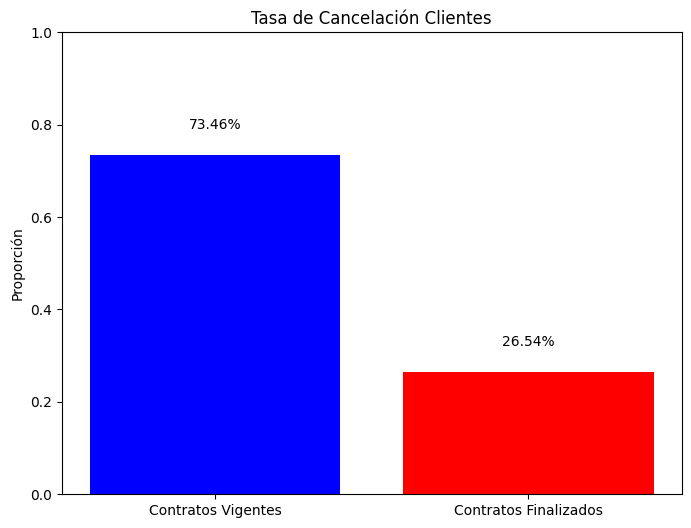

In [35]:
#Transformación de 'estado_contrato' a tipo numérico
telecom_data2.estado_contrato = telecom_data2.estado_contrato.map({'finalizado':1,'vigente':0})
telecom_data2['estado_contrato'] = telecom_data2['estado_contrato'].astype('int64')

#Calcular la tasa de cancelación en general
tasa_cancelacion_general = telecom_data2['estado_contrato'].mean()
print(f"Tasa de Cancelación de los Clientes: {tasa_cancelacion_general:.2%}")

#Preparar los datos para el gráfico
labels = ['Contratos Vigentes', 'Contratos Finalizados']
values = [1 - tasa_cancelacion_general, tasa_cancelacion_general] 

#Crear el gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=['blue', 'red'])

#Agregar etiquetas y título
plt.ylabel('Proporción')
plt.title('Tasa de Cancelación Clientes')
plt.ylim(0, 1)  

#Mostrar los valores en las barras
for bar, value in zip(bars, values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'{value:.2%}', ha='center', va='bottom')

#Mostrar el gráfico
plt.show()

Transformamos la columna 'estado_contrato' a tipo numérico y cálculamos la tasa de cancelación general de clientes. La tasa de cancelación de clientes es del 26.54%. El gráfico de barras muestra esta tasa mediante dos barras etiquetadas como 'Contratos Vigentes' y 'Contratos Finalizados', donde la barra roja representa la proporción de contratos finalizados (26.54%) y la barra azul representa la proporción de contratos vigentes (73.46%).

#### Tasa de Cancelacion de acuerdo a la información personal de clientes

In [36]:
#Calcular la tasa de cancelación por cada característica de los clientes
caracteristicas_clientes = ['genero', 'ciudadano_senior', 'pareja', 'dependientes']

for caracteristica in caracteristicas_clientes:
    tabla_canc_clientes = telecom_data2[[caracteristica, 'estado_contrato']].groupby([caracteristica], as_index=False).mean().sort_values(by='estado_contrato', ascending=False)
    tabla_canc_clientes.rename(columns={'estado_contrato': 'tasa_cancelacion'}, inplace=True)
    display(tabla_canc_clientes)

,genero,tasa_cancelacion
0,Female,0.269209
1,Male,0.261603


,ciudadano_senior,tasa_cancelacion
1,1,0.416813
0,0,0.236062


,pareja,tasa_cancelacion
0,No,0.329580
1,Yes,0.196649


,dependientes,tasa_cancelacion
0,No,0.312791
1,Yes,0.154502


Calculamos la tasa de cancelación para cada característica de los clientes (género, ciudadano senior, pareja y dependientes). Utilizamos un bucle for para iterar sobre cada característica, y mostramos las tablas que contienen la característica y la tasa de cancelación correspondiente, ordenada de mayor a menor la tasa de cancelación.

#### Tasa de Cancelacion de acuerdo a la información de contratos

In [37]:
#Calcular la tasa de cancelación por cada característica de los contratos
caracteristicas_contratos = ['tipo_contrato', 'facturacion_electronica', 'metodo_pago']

for caracteristica in caracteristicas_contratos:
    tabla_canc_contratos = telecom_data2[[caracteristica, 'estado_contrato']].groupby([caracteristica], as_index=False).mean().sort_values(by='estado_contrato', ascending=False)
    tabla_canc_contratos.rename(columns={'estado_contrato': 'tasa_cancelacion'}, inplace=True)
    display(tabla_canc_contratos)

,tipo_contrato,tasa_cancelacion
0,Month-to-month,0.427097
1,One year,0.112695
2,Two year,0.028319


,facturacion_electronica,tasa_cancelacion
1,Yes,0.335651
0,No,0.163301


,metodo_pago,tasa_cancelacion
2,Electronic check,0.452854
3,Mailed check,0.191067
0,Bank transfer (automatic),0.167098
1,Credit card (automatic),0.152431


Calculamos la tasa de cancelación para cada característica de los contratos, como tipo de contrato, facturación electrónica y método de pago, mostrando los porcentajes respectivos ordenados de mayor a menor tasa.

#### Tasa de Cancelacion de acuerdo a la información de internet

In [38]:
#Calcular la tasa de cancelación por cada característica de internet
caracteristicas_internet = ['servicio_internet', 'seguridad_en_linea', 'respaldo_en_linea', 'proteccion_dispositivo', 'soporte_tecnico', 'tv_streaming', 'peliculas_streaming']

for caracteristica in caracteristicas_internet:
    tabla_canc_internet = telecom_data2[[caracteristica, 'estado_contrato']].groupby([caracteristica], as_index=False).mean().sort_values(by='estado_contrato', ascending=False)
    tabla_canc_internet.rename(columns={'estado_contrato': 'tasa_cancelacion'}, inplace=True)
    display(tabla_canc_internet)

,servicio_internet,tasa_cancelacion
1,Fiber optic,0.418928
0,DSL,0.189591
2,No,0.074050


,seguridad_en_linea,tasa_cancelacion
0,No,0.313296
1,Yes,0.146112


,respaldo_en_linea,tasa_cancelacion
0,No,0.291721
1,Yes,0.215315


,proteccion_dispositivo,tasa_cancelacion
0,No,0.286518
1,Yes,0.225021


,soporte_tecnico,tasa_cancelacion
0,No,0.311862
1,Yes,0.151663


,tv_streaming,tasa_cancelacion
1,Yes,0.300702
0,No,0.243312


,peliculas_streaming,tasa_cancelacion
1,Yes,0.299414
0,No,0.243795


Calculamos la tasa de cancelación para cada característica relacionada con los servicios de internet, como tipo de servicio de internet, seguridad en línea, respaldo en línea, protección de dispositivo, soporte técnico, streaming de TV y streaming de películas, mostramos las tablas que indican la tasa de cancelación para cada una de las características mencionadas, ordenadas de mayor a menor tasa de cancelación.


#### Tasa de Cancelacion de acuerdo a la información de telefonos

In [39]:
#Calcular la tasa de cancelación por cada característica de internet
caracteristicas_telefono = ['servicio_telefono', 'lineas_multiples']

for caracteristica in caracteristicas_telefono:
    tabla_canc_telefono = telecom_data2[[caracteristica, 'estado_contrato']].groupby([caracteristica], as_index=False).mean().sort_values(by='estado_contrato', ascending=False)
    tabla_canc_telefono.rename(columns={'estado_contrato': 'tasa_cancelacion'}, inplace=True)
    display(tabla_canc_telefono)

,servicio_telefono,tasa_cancelacion
1,Sí,0.267096
0,No,0.249267


,lineas_multiples,tasa_cancelacion
1,Yes,0.286099
0,No,0.250246


Calculamos la tasa de cancelación para cada característica relacionada con los servicios de teléfono, como servicio de teléfono y múltiples líneas y mostramos las tablas que indican la tasa de cancelación para cada una de las características mencionadas, ordenadas de mayor a menor tasa de cancelación.

#### Visualización de los Datos

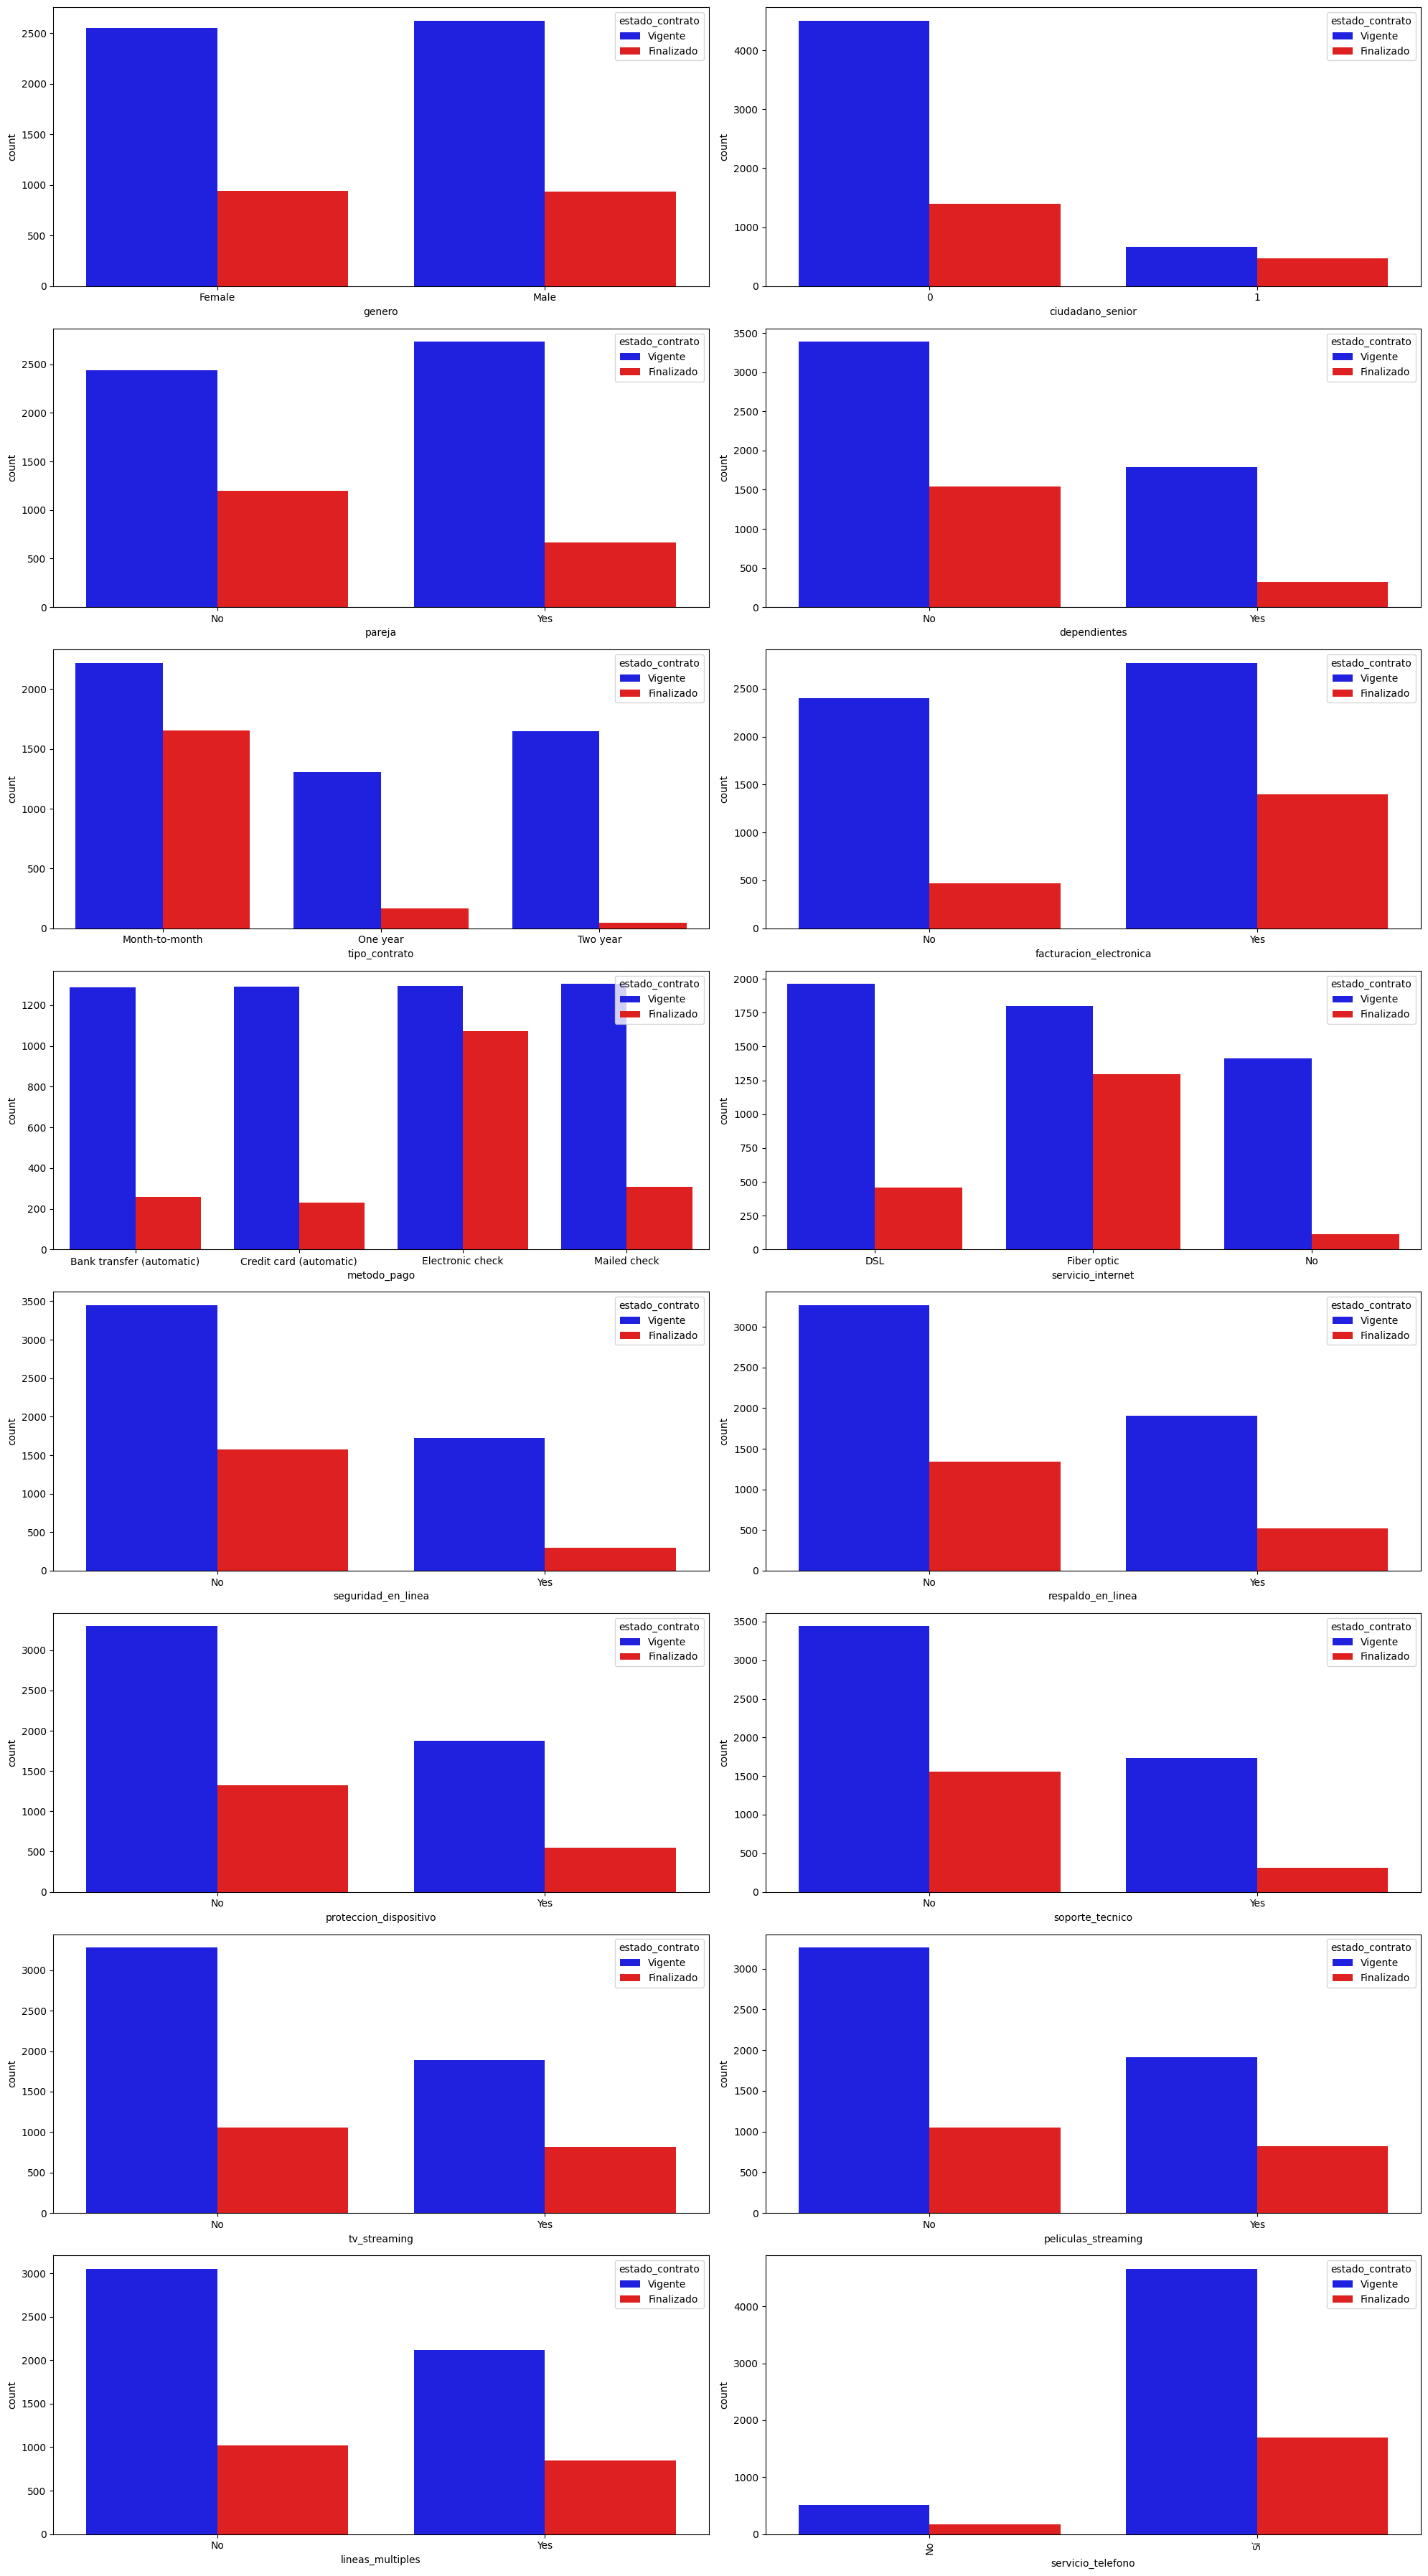

In [40]:
#Mapeo de etiquetas de estado_contrato
estado_contrato_map = {0: 'Vigente', 1: 'Finalizado'}

#Crear la figura y los ejes para los subplots
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(20, 36))

#Definir los gráficos de barras para cada variable categórica
sns.countplot(x="genero", hue="estado_contrato", data=telecom_data2.replace({"estado_contrato": estado_contrato_map}), ax=axes[0, 0], palette=["blue", "red"])
sns.countplot(x="ciudadano_senior", hue="estado_contrato", data=telecom_data2.replace({"estado_contrato": estado_contrato_map}), ax=axes[0, 1], palette=["blue", "red"])
sns.countplot(x="pareja", hue="estado_contrato", data=telecom_data2.replace({"estado_contrato": estado_contrato_map}), ax=axes[1, 0], palette=["blue", "red"])
sns.countplot(x="dependientes", hue="estado_contrato", data=telecom_data2.replace({"estado_contrato": estado_contrato_map}), ax=axes[1, 1], palette=["blue", "red"])
sns.countplot(x="tipo_contrato", hue="estado_contrato", data=telecom_data2.replace({"estado_contrato": estado_contrato_map}), ax=axes[2, 0], palette=["blue", "red"])
sns.countplot(x="facturacion_electronica", hue="estado_contrato", data=telecom_data2.replace({"estado_contrato": estado_contrato_map}), ax=axes[2, 1], palette=["blue", "red"])
sns.countplot(x="metodo_pago", hue="estado_contrato", data=telecom_data2.replace({"estado_contrato": estado_contrato_map}), ax=axes[3, 0], palette=["blue", "red"])
sns.countplot(x="servicio_internet", hue="estado_contrato", data=telecom_data2.replace({"estado_contrato": estado_contrato_map}), ax=axes[3, 1], palette=["blue", "red"])
sns.countplot(x="seguridad_en_linea", hue="estado_contrato", data=telecom_data2.replace({"estado_contrato": estado_contrato_map}), ax=axes[4, 0], palette=["blue", "red"])
sns.countplot(x="respaldo_en_linea", hue="estado_contrato", data=telecom_data2.replace({"estado_contrato": estado_contrato_map}), ax=axes[4, 1], palette=["blue", "red"])
sns.countplot(x="proteccion_dispositivo", hue="estado_contrato", data=telecom_data2.replace({"estado_contrato": estado_contrato_map}), ax=axes[5, 0], palette=["blue", "red"])
sns.countplot(x="soporte_tecnico", hue="estado_contrato", data=telecom_data2.replace({"estado_contrato": estado_contrato_map}), ax=axes[5, 1], palette=["blue", "red"])
sns.countplot(x="tv_streaming", hue="estado_contrato", data=telecom_data2.replace({"estado_contrato": estado_contrato_map}), ax=axes[6, 0], palette=["blue", "red"])
sns.countplot(x="peliculas_streaming", hue="estado_contrato", data=telecom_data2.replace({"estado_contrato": estado_contrato_map}), ax=axes[6, 1], palette=["blue", "red"])
sns.countplot(x="lineas_multiples", hue="estado_contrato", data=telecom_data2.replace({"estado_contrato": estado_contrato_map}), ax=axes[7, 0], palette=["blue", "red"])
sns.countplot(x="servicio_telefono", hue="estado_contrato", data=telecom_data2.replace({"estado_contrato": estado_contrato_map}), ax=axes[7, 1], palette=["blue", "red"])

#Configuración adicional
axes[7, 1].set_xticklabels(axes[7, 1].get_xticklabels(), rotation=90)  # Rotar etiquetas del eje x

#Ajustar el espaciado entre subplots
plt.tight_layout()

#Mostrar el gráfico
plt.show()

Creamos una visualización mediante subplots de 8 filas y 2 columnas para mostrar gráficos de barras que representan la distribución de las variables categóricas con respecto al estado del contrato (vigente o finalizado). Cada subplot muestra un gráfico de barras para una característica específica. Cada gráfico de barras está dividido en dos colores (azul y rojo) que representan los estados de contrato "Vigente" y "Finalizado", respectivamente.

#### Estadisticas Descriptivas

In [41]:
#Estadisticas descriptivas de las variables numericas
telecom_data2[['cargos_mensuales', 'cargos_totales', 'numero_meses']].describe()

,cargos_mensuales,cargos_totales,numero_meses
count,7043.000000,7043.000000,7043.000000
mean,64.761692,2283.300441,32.371149
std,30.090047,2265.000258,24.559481
min,18.250000,18.800000,0.000000
25%,35.500000,402.225000,9.000000
50%,70.350000,1400.550000,29.000000
75%,89.850000,3786.600000,55.000000
max,118.750000,8684.800000,72.000000


Calculamos las estadísticas descriptivas (conteo, media, desviación estándar, mínimo, percentiles 25%, 50%, 75% y máximo) para las variables numéricas cargos_mensuales, cargos_totales y numero_meses del DataFrame "telecom_data2". Estos valores muestran que, en promedio, los clientes tienen un cargo mensual de 64.76 unidades monetarias, un total de cargos acumulados de 2283.30 unidades monetarias y una permanencia promedio de 32 meses en la compañía.

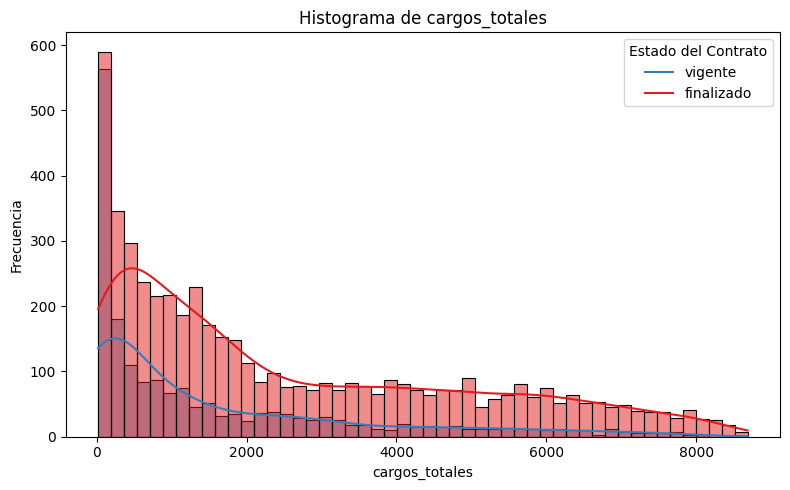

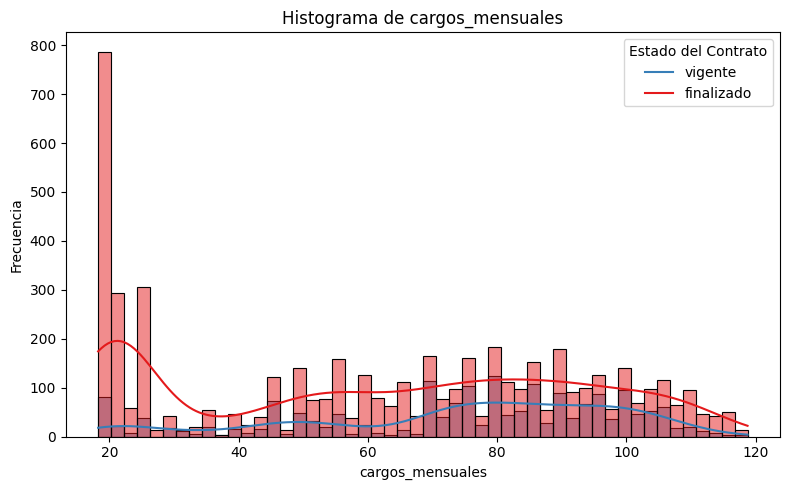

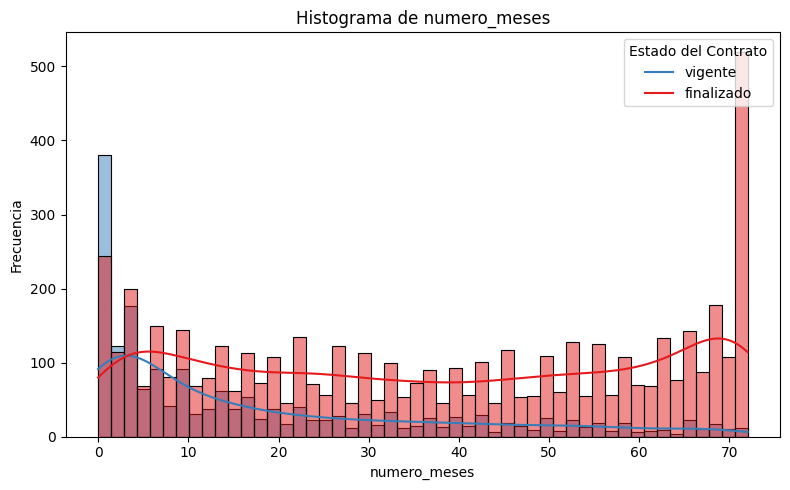

In [42]:
#Lista de características numéricas para análisis
var_num = ['cargos_totales', 'cargos_mensuales', 'numero_meses']

for feature in var_num:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=telecom_data2, x=feature, hue='estado_contrato', bins=50, kde=True, palette='Set1')
    plt.title(f'Histograma de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.legend(title='Estado del Contrato', loc='upper right', labels=['vigente', 'finalizado'])
    plt.tight_layout()
    plt.show()

Generamos tres histogramas utilizando seaborn para visualizar la distribución de tres variables numéricas (cargos_totales, cargos_mensuales, numero_meses) del DataFrame telecom_data2, diferenciando entre clientes con contratos vigentes y finalizados.

### Conclusiones de EDA

En el análisis exploratorio de datos (EDA) realizado:

**Clientes y Características Personales:**

- La tasa de cancelación promedio es del 26.54%.
- Los clientes mayores tienen una tasa de cancelación del 41.68%, considerablemente más alta que la de clientes más jóvenes (23.61%).
- Clientes sin pareja tienen una tasa de cancelación del 32.96%, mientras que aquellos con pareja tienen solo un 19.66%.
- La presencia de dependientes también influye: los clientes sin dependientes tienen una tasa del 31.28%, comparado con el 15.45% en aquellos con dependientes.

**Contratos:**

- Los contratos de corto plazo (Month-to-month) tienen la tasa de cancelación más alta (42.71%).
- La facturación electrónica y el método de pago electrónico cheque están asociados con tasas de cancelación más altas (33.57% y 45.29%, respectivamente).
- Los contratos a largo plazo (Two year) tienen la tasa de cancelación más baja (2.83%).

**Servicios y Tecnologías:**

- Los servicios de Internet de fibra óptica tienen una tasa de cancelación del 41.89%, considerablemente más alta que los servicios DSL (18.96%).
- Servicios adicionales como seguridad en línea, respaldo en línea, y soporte técnico están asociados con menores tasas de cancelación.
- La presencia de servicios adicionales como TV Streaming y Películas Streaming no parece influir significativamente en la tasa de cancelación.

**Variables Numéricas:**

- El cargo mensual promedio es de 64.76, con una desviación estándar de 30.09.
- El cargo total promedio es de 2283.30, con una desviación estándar de 2265.00.
- La duración promedio de la relación con la compañía es de 32 meses, con una desviación estándar de 24 meses.


Destacamos las principales tendencias observadas en relación con la cancelación de servicios, basadas en características personales, tipos de contratos, servicios adicionales y variables numéricas del conjunto de datos analizado.

## Preparación de Datos y Selección de Características

### Tecnica Bootstrapping

In [43]:
#Eliminar columna id_cliente para un mejor manejo de datos
columnas_a_eliminar = ['id_cliente']
telecom_data = telecom_data.drop(columnas_a_eliminar, axis=1)

#Boostrapping
telecom_data = telecom_data.append(telecom_data.sample(frac=1, random_state=88), ignore_index=True)
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14086 entries, 0 to 14085
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   genero                   14086 non-null  category
 1   ciudadano_senior         14086 non-null  category
 2   pareja                   14086 non-null  category
 3   dependientes             14086 non-null  category
 4   tipo_contrato            14086 non-null  category
 5   facturacion_electronica  14086 non-null  category
 6   metodo_pago              14086 non-null  category
 7   cargos_mensuales         14086 non-null  float64 
 8   cargos_totales           14086 non-null  float64 
 9   estado_contrato          14086 non-null  category
 10  numero_meses             14086 non-null  int64   
 11  servicio_internet        14086 non-null  category
 12  seguridad_en_linea       14086 non-null  category
 13  respaldo_en_linea        14086 non-null  category
 14  protec

Eliminamos la columna 'id_cliente' del DataFrame "telecom_data" para mejorar la gestión de datos. Luego, aplicamos la técnica de Bootstrapping  para aumentar la robustez de los modelos al generar múltiples muestras del conjunto de datos original, permitiendo obtener estimaciones más precisas y reducir el sesgo duplicando aleatoriamente todas las filas del DataFrame, resultando en un nuevo DataFrame con el doble de filas (14,086 en total).

### Transformación de Caracteristicas Categoricas en Numéricas

In [44]:
#Codificación One-Hot
telecom_data = pd.get_dummies(telecom_data, drop_first=True)
telecom_data.head()

,cargos_mensuales,cargos_totales,numero_meses,genero_Male,ciudadano_senior_1,pareja_Yes,dependientes_Yes,tipo_contrato_One year,tipo_contrato_Two year,facturacion_electronica_Yes,...,servicio_internet_Fiber optic,servicio_internet_No,seguridad_en_linea_Yes,respaldo_en_linea_Yes,proteccion_dispositivo_Yes,soporte_tecnico_Yes,tv_streaming_Yes,peliculas_streaming_Yes,lineas_multiples_Yes,servicio_telefono_Sí
0,29.85,29.85,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,56.95,1889.50,34,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
2,53.85,108.15,2,1,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,1
3,42.30,1840.75,45,1,0,0,0,1,0,0,...,0,0,1,0,1,1,0,0,0,0
4,70.70,151.65,2,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


Realizamos la transformación de características categóricas en numéricas utilizando la codificación One-Hot mediante la función `pd.get_dummies()`. Esta función convierte las variables categóricas en variables dummy, es decir, variables binarias que indican la presencia o ausencia de una categoría particular.

Después de aplicar `pd.get_dummies()`, el DataFrame "telecom_data" ahora contiene columnas adicionales para cada categoría única de las características originales. Las columnas originales de características categóricas se reemplazan por estas columnas dummy, donde 1 representa la presencia de la categoría y 0 su ausencia. El parámetro `drop_first=True` se utiliza para evitar la multicolinealidad al eliminar la primera columna dummy de cada conjunto.

### Escalado de Carateristicas

In [45]:
# Seleccionar las características numéricas a escalar
var_num = ['cargos_mensuales', 'cargos_totales', 'numero_meses']

# Inicializar el escalador
scaler = StandardScaler()

# Aplicar el escalado a las características numéricas seleccionadas
telecom_data[var_num] = scaler.fit_transform(telecom_data[var_num])
telecom_data[var_num].head()

,cargos_mensuales,cargos_totales,numero_meses
0,-1.160323,-0.994971,-1.277445
1,-0.259629,-0.173876,0.066327
2,-0.362660,-0.960399,-1.236724
3,-0.746535,-0.195400,0.514251
4,0.197365,-0.941193,-1.236724


Escalamos las características numéricas "cargos_mensuales", "cargos_totales", y "numero_meses" del DataFrame "telecom_data" utilizando la técnica StandardScaler de scikit-learn. Esta técnica transforma las características de manera que tengan una media de 0 y una desviación estándar de 1. Después de inicializar el escalador StandardScaler(), aplicamos el escalado a las características seleccionadas usando scaler.fit_transform(). Esto ajusta el escalador a los datos y transforma las características numéricas para que estén en la misma escala.

### Conclusiónes

En la Preparación de Datos y Selección de Características se realizo:

- Se aplicó la técnica de Bootstrapping para aumentar el tamaño del conjunto de datos, duplicando las observaciones existentes de manera aleatoria a 14086 datos.

- Se transformaron características categóricas en variables numéricas utilizando codificación one-hot, lo cual permite incluir estas características en modelos de aprendizaje automático.

- Las características numéricas fueron escaladas usando StandardScaler para asegurar que todas tengan una distribución estándar similar, facilitando el entrenamiento de modelos que puedan ser sensibles a diferencias de escala.



## Entrenamiento del Modelo

### División de entrenamiento y prueba

In [46]:
#Segmentar los datos
data_train, data_valid = train_test_split(telecom_data, test_size=0.4, random_state=88)
data_train, data_valid
data_valid, data_test = train_test_split(data_valid, test_size=0.5, random_state=88) 

target_train = data_train['estado_contrato_vigente']
features_train = data_train.drop(['estado_contrato_vigente'], axis = 1)
target_valid = data_valid['estado_contrato_vigente']
features_valid = data_valid.drop(['estado_contrato_vigente'], axis = 1)
target_test = data_test['estado_contrato_vigente']
features_test = data_test.drop(['estado_contrato_vigente'], axis = 1)

print('Dataset de entrenamiento', features_train.shape, target_train.shape)
print('Dataset de validacion', features_valid.shape, target_valid.shape)
print('Dataset de prueba', features_test.shape, target_test.shape)

Dataset de entrenamiento (8451, 23) (8451,)
Dataset de validacion (2817, 23) (2817,)
Dataset de prueba (2818, 23) (2818,)


Segmentamos el conjunto de datos "telecom_data" en conjuntos de entrenamiento, validación y prueba utilizando train_test_split de scikit-learn. Primero, dividimos "telecom_data" en data_train y data_valid, donde data_train contiene el 60% de los datos y data_valid el 40%. Luego, dividimos data_valid en data_valid y data_test, asignando el 20% de los datos originales a data_test. Finalmente, separamos las características (features) de las etiquetas (target) en cada conjunto de datos.

- Dataset de entrenamiento: Contiene 8451 observaciones y 23 características.
- Dataset de validación: Contiene 2817 observaciones y 23 características.
- Dataset de prueba: Contiene 2818 observaciones y 23 características.

### Entrenamiento de diferentes Modelos en el conjunto de Validación

#### Modelo Random Forest

In [47]:
#Modelo Random Forest
model_rfc = RandomForestClassifier(random_state=88)

#Validación cruzada
cv_scores = cross_val_score(model_rfc, features_train, target_train, cv=3, scoring='roc_auc')

#Entrenamiento del modelo
model_rfc.fit(features_train, target_train)

#Predicción y Evaluación en Conjunto de Validación
predicted_valid = model_rfc.predict(features_valid)
auc_roc_valid = roc_auc_score(target_valid, predicted_valid)
accuracy_valid = accuracy_score(target_valid, predicted_valid)

print(f"Métrica AUC-ROC en conjunto de validación: {auc_roc_valid:.4f}")
print(f"Métrica Exactitud en conjunto de validación: {accuracy_valid:.4f}")

Métrica AUC-ROC en conjunto de validación: 0.8735
Métrica Exactitud en conjunto de validación: 0.9123


- **Modelo Random Forest:** Inicializamos un modelo de Random Forest Classifier con un estado aleatorio fijo.

- **Validación cruzada:** Utilizamos cross_val_score con 3 folds (cv=3) y métrica de evaluación ROC AUC (scoring='roc_auc') para evaluar el rendimiento del modelo.

- **Entrenamiento del modelo:** Ajustamos el modelo Random Forest utilizando los datos de entrenamiento (features_train y target_train).

- **Predicción y Evaluación:** Realizamos predicciones en el conjunto de validación (features_valid) y evalúa el modelo utilizando las métricas de AUC-ROC y exactitud.

El resultado en las metricas que obtuvimos en el modelo Random Forest en el conjunto de validación, son de AUC-ROC de 0.8735 y una exactitud del 91.23%.

#### Modelo DecisionTree

In [48]:
#Modelo árbol de decisión
model_dtc = DecisionTreeClassifier(random_state=88)

#Validación cruzada
cv_scores = cross_val_score(model_dtc, features_train, target_train, cv=3, scoring='roc_auc')

#Entrenamiento del modelo
model_dtc.fit(features_train, target_train)

#Predicción y Evaluación en Conjunto de Validación
predicted_valid = model_dtc.predict(features_valid)
auc_roc_valid = roc_auc_score(target_valid, predicted_valid)
accuracy_valid = accuracy_score(target_valid, predicted_valid)

print(f"Métrica AUC-ROC en conjunto de validación: {auc_roc_valid:.4f}")
print(f"Métrica Exactitud en conjunto de validación: {accuracy_valid:.4f}")



Métrica AUC-ROC en conjunto de validación: 0.8553
Métrica Exactitud en conjunto de validación: 0.8857


- **Modelo Árbol de Decisión:** Inicializamos un modelo de árbol de decisión (DecisionTreeClassifier) con un estado aleatorio fijo.

- **Validación Cruzada:** Utilizamos cross_val_score con 3 folds (cv=3) y métrica de evaluación ROC AUC (scoring='roc_auc') para evaluar el rendimiento del modelo.

- **Entrenamiento del Modelo:** Ajustamos el modelo de árbol de decisión utilizando los datos de entrenamiento (features_train y target_train).

- **Predicción y Evaluación:** Realizamos predicciones en el conjunto de validación (features_valid) y calculamos las métricas de AUC-ROC y exactitud (accuracy_valid).

El resultado en las metricas que obtuvimos en el modelo árbol de decisión en el conjunto de validación, son de AUC-ROC de 0.8553 y una exactitud del 88.57%.

#### Modelo XGBoost

In [49]:
from xgboost import XGBClassifier

#Modelo XGBoost
model_xgb = XGBClassifier(random_state=88, use_label_encoder=False, eval_metric='logloss')

#Validación cruzada
cv_scores = cross_val_score(model_xgb, features_train, target_train, cv=5, scoring='roc_auc')

#Entrenamiento del modelo
model_xgb.fit(features_train, target_train)

#Predicción y Evaluación en Conjunto de Validación
predicted_valid = model_xgb.predict(features_valid)
auc_roc_valid = roc_auc_score(target_valid, predicted_valid)
accuracy_valid = accuracy_score(target_valid, predicted_valid)

print(f"Métrica AUC-ROC en conjunto de validación: {auc_roc_valid:.4f}")
print(f"Métrica Exactitud en conjunto de validación: {accuracy_valid:.4f}")

Métrica AUC-ROC en conjunto de validación: 0.8012
Métrica Exactitud en conjunto de validación: 0.8605


- **Modelo XGBoost:** Inicializamos un modelo XGBoost (XGBClassifier) con un estado aleatorio fijo, desactivando el uso del codificador de etiquetas (use_label_encoder=False) y utilizando la métrica de evaluación de pérdida logarítmica (eval_metric='logloss').

- **Validación Cruzada:** Utilizamos cross_val_score con 5 folds (cv=5) y métrica de evaluación ROC AUC (scoring='roc_auc') para evaluar el rendimiento del modelo.

- **Entrenamiento del Modelo:** Ajustamos el modelo XGBoost utilizando los datos de entrenamiento (features_train y target_train).

- **Predicción y Evaluación:** Realizamos predicciones en el conjunto de validación (features_valid) y calculamos las métricas de AUC-ROC y exactitud (accuracy_valid).

El resultado en las metricas que obtuvimos en el modelo XGBoost en el conjunto de validación, son de AUC-ROC de 0.8012 y una exactitud del 86.05%.

### Conclusiones 

En el Entrenamiento de Modelos realizado:

- División de datos: Se dividió el conjunto de datos en entrenamiento, validación y prueba utilizando el método train_test_split de scikit-learn. Esto permite evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento.

Modelos entrenados:

- **Random Forest:** Utilizado para clasificación, con métricas de AUC-ROC en validación de aproximadamente 0.8735 y exactitud de 0.9123. Este modelo mostró un buen desempeño inicial en la predicción de la cancelación de contratos.


- **Decision Tree:** Otro modelo utilizado para clasificación, con métricas de AUC-ROC en validación de aproximadamente 0.8553 y exactitud de 0.8857. Aunque ligeramente menos que el Random Forest, aún demostró ser efectivo en la clasificación.


- **XGBoost:** Implementado con un enfoque de boosting extremo, con métricas de AUC-ROC en validación de aproximadamente 0.8012 y exactitud de 0.8605. Aunque tuvo un rendimiento ligeramente inferior a los otros dos modelos en esta evaluación específica, XGBoost sigue siendo una opción robusta y flexible para problemas de clasificación.


- Validación cruzada: Se utilizó la validación cruzada para evaluar el rendimiento de los modelos de manera más robusta, utilizando diferentes particiones de los datos de entrenamiento. Esto proporciona una estimación más confiable del rendimiento general del modelo.


- Selección de métricas: Las métricas de AUC-ROC y exactitud fueron elegidas para evaluar el rendimiento de los modelos en la predicción de la cancelación de contratos. La AUC-ROC es útil para evaluar la capacidad de discriminación del modelo, mientras que la exactitud proporciona una medida general de la precisión en las predicciones.

Se entrenaron varios modelos de clasificación utilizando diferentes técnicas (Random Forest, Decision Tree, XGBoost) y se evaluaron utilizando métricas clave. Cada modelo mostró un rendimiento competitivo, con **Random Forest** destacándose ligeramente en términos de AUC-ROC y exactitud siendo nuestra elección del **modelo final** para evaluarlo en el conjunto de prueba.

## Evaluación del mejor modelo

Métrica AUC-ROC en conjunto de prueba: 0.8749
Métrica Exactitud en conjunto de prueba: 0.9138

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       756
           1       0.93      0.96      0.94      2062

    accuracy                           0.91      2818
   macro avg       0.90      0.87      0.89      2818
weighted avg       0.91      0.91      0.91      2818



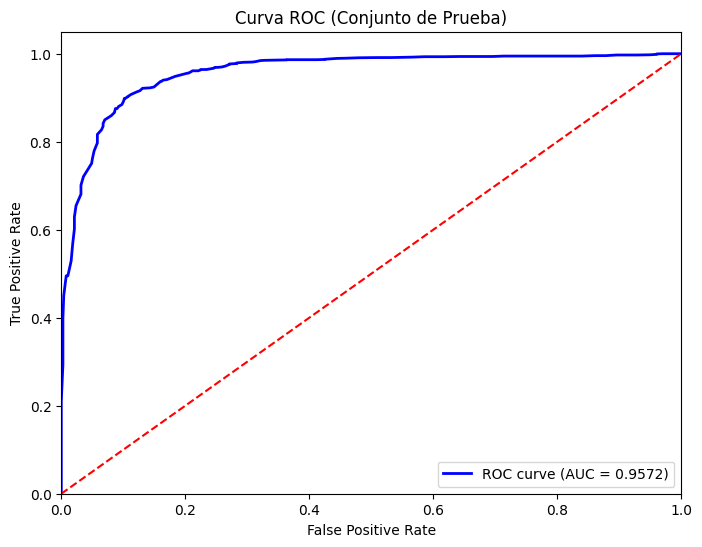

In [50]:
#Evaluación final en el conjunto de prueba
predicted_test = model_rfc.predict(features_test)
auc_roc_test = roc_auc_score(target_test, predicted_test)
accuracy_test = accuracy_score(target_test, predicted_test)

print(f"Métrica AUC-ROC en conjunto de prueba: {auc_roc_test:.4f}")
print(f"Métrica Exactitud en conjunto de prueba: {accuracy_test:.4f}")

#Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(target_test, predicted_test))

#Generación de la Curva ROC
fpr, tpr, thresholds = roc_curve(target_test, model_rfc.predict_proba(features_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC (Conjunto de Prueba)')
plt.legend(loc='lower right')
plt.show()

Realizamos la evaluación final del modelo Random Forest en el conjunto de prueba, prediciendo y evaluando el rendimiento del modelo en términos de AUC-ROC y exactitud. Generamos un reporte de clasificación que incluye precisión, recall y F1-score para cada clase. Además, creamos y visuaizamos la curva ROC, mostrando la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos para diferentes umbrales de decisión, incluyendo el cálculo del AUC para proporcionar una medida única del rendimiento del modelo. El modelo Random Forest logró un AUC-ROC de 0.8749 y una exactitud de 0.9138 en el conjunto de prueba. En el reporte de clasificación, la clase 0 (no finalizado) tiene una precisión de 0.88, un recall de 0.79 y un f1-score de 0.83, mientras que la clase 1 (finalizado) muestra una precisión de 0.93, un recall de 0.96 y un f1-score de 0.94. La precisión general del modelo es alta con una media ponderada de precisión, recall y f1-score de 0.91, lo que indica un buen rendimiento del modelo.

## Informe de Solución

**Resumen Ejecutivo**

Este informe presenta un análisis detallado de los datos de clientes y el desarrollo de modelos predictivos para identificar la probabilidad de cancelación de contratos en la compañía de telecomunicaciones. Nuestro objetivo principal es entender los factores que influyen en la cancelación de contratos y proporcionar un modelo predictivo eficaz para mitigar esta problemática.

**Análisis Exploratorio de Datos (EDA)**

El análisis exploratorio de datos se realizó para comprender mejor las características de los clientes y su relación con la cancelación de contratos. Aquí están los puntos clave:

**Tasas de Cancelación**

- Se calculó la tasa de cancelación general y por diferentes características demográficas y de servicio.

- La tasa de cancelación varía significativamente entre diferentes segmentos de clientes, como género, ciudadanos senior, y tipos de contrato.

**Estadísticas Descriptivas**

- El cargo mensual promedio es de 64.76 unidades monetarias, el total de cargos promedios es de 2283.30 unidades monetarias y el tiempo promedio de permanencia de los clientes es de 32 meses.

- Estos datos proporcionan una visión general del perfil financiero y de permanencia de nuestros clientes.

**Visualización de Datos**

- Se realizaron gráficos de barras e histogramas para visualizar la distribución de las variables categóricas y numéricas.

- Estas visualizaciones ayudaron a identificar patrones y tendencias importantes en los datos.

**Preparación de Datos**

Para garantizar que nuestros modelos sean precisos y eficientes, se realizaron varias etapas de preparación de datos:

- Eliminación de Columnas Irrelevantes: Se eliminó la columna `id_cliente` para simplificar el análisis.

- Aumento de la Muestra: Se utilizó la técnica de bootstrapping para duplicar la muestra de datos, mejorando así la robustez del modelo.

- Transformación de Datos: Las características categóricas se transformaron en variables numéricas utilizando codificación one-hot. Las variables numéricas fueron escaladas para estandarizar los datos.

**Entrenamiento y Evaluación de Modelos**

Se entrenaron y evaluaron varios modelos de machine learning para predecir la cancelación de contratos. Aquí están los resultados clave:

Random Forest:
Este modelo mostró un rendimiento excelente con una métrica AUC-ROC de 0.8735 y una exactitud de 0.9123 en el conjunto de validación.

Decision Tree:
Este modelo tuvo una métrica AUC-ROC de 0.8553 y una exactitud de 0.8857 en el conjunto de validación.

XGBoost:
Este modelo obtuvo una métrica AUC-ROC de 0.8012 y una exactitud de 0.8605 en el conjunto de validación.

**Evaluación Final en el Conjunto de Prueba**

El modelo de Random Forest, siendo el más eficaz durante la validación, se evaluó en el conjunto de prueba:

**Resultados**

- Métrica AUC-ROC: 0.8749

- Exactitud: 0.9138

- La precisión y el recall también fueron elevados, con una precisión del 93% y un recall del 96% para clientes que no cancelaron, y del 88% y 79% para aquellos que cancelaron.

**Curva ROC**

- Se generó la curva ROC, la cual mostró un rendimiento robusto del modelo con un área bajo la curva (AUC) significativa.

**Conclusiones y Recomendaciones**

El análisis realizado y los modelos desarrollados proporcionan una herramienta valiosa para predecir la cancelación de contratos de los clientes. Las siguientes acciones pueden ayudar a mitigar la cancelación:

- Segmentación de Clientes: Utilizar el modelo para identificar segmentos de clientes con alta probabilidad de cancelación y dirigir campañas de retención personalizadas.

- Mejora de Servicios: Identificar las características del servicio que más influyen en la cancelación y trabajar en su mejora.

- Monitoreo Continuo: Implementar el modelo en un entorno de producción para el monitoreo continuo y la predicción de cancelaciones futuras.

